In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

candidats = ["Macron","Lasalle","Pouton","DupontAignan","Zemmour","Pecresse","Jadot","Hidalgo","Melanchon","Lepen","Roussel","Arthaud"]



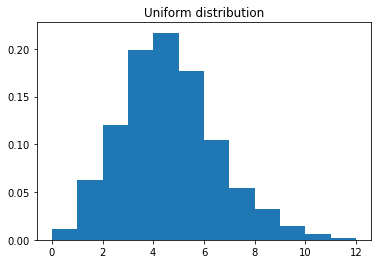

In [3]:
distri = np.random.binomial(50,1/len(candidats),1000) # une array de 1000 valeurs d'une loi binomiale de 50 tirages avec probabilité de succès (1/len(candidats).

counts, bins, bars = plt.hist(distri,bins=len(candidats),density=True)
plt.title(f'Uniform distribution')
plt.show()

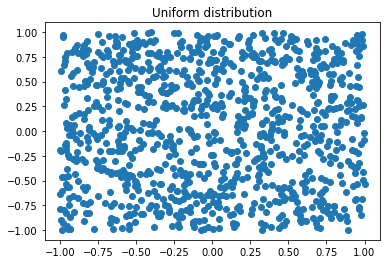

In [4]:
coordinates = []
for i in range(1000):
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    coordinates.append((x, y))
    
import matplotlib.pyplot as plt

# générer les coordonnées comme précédemment

# Affiche un graphique à nuage de points
plt.scatter([x for x, y in coordinates], [y for x, y in coordinates])
plt.title(f'Uniform distribution')
plt.show()

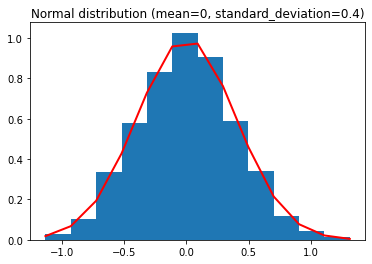

In [5]:
mu, sigma = 0, 0.4 # mean and standard deviation

s = np.random.normal(mu, sigma, 1000)

import matplotlib.pyplot as plt

count, bins, ignored = plt.hist(s, len(candidats), density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.title(f'Normal distribution (mean={mu}, standard_deviation={sigma})')
plt.show()

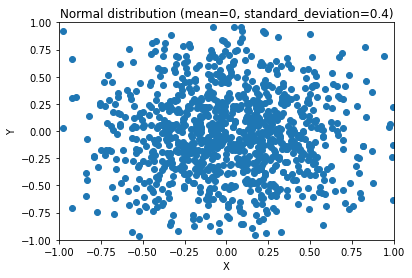

In [6]:
coordinates = []
count = 0

mean = 0
std_dev = 0.4 # + c'est grand + c'est dispersé et inversement

# transformée de Box-Muller

def normal_distribution(mean, std_dev):
    u1 = random.random()
    u2 = random.random()
    z1 = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
    x = mean + z1 * std_dev
    return x


while count < 1000:
    x = normal_distribution(mean, std_dev)
    y = normal_distribution(mean, std_dev)

    if abs(x)<=1 and abs(y)<=1: # Mapping the coordinate to the [-1, 1] range
        coordinates.append([x,y])
        count += 1

# Plotting the coordinates
x = [c[0] for c in coordinates]
y = [c[1] for c in coordinates]
plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f'Normal distribution (mean={mean}, standard_deviation={std_dev})')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()



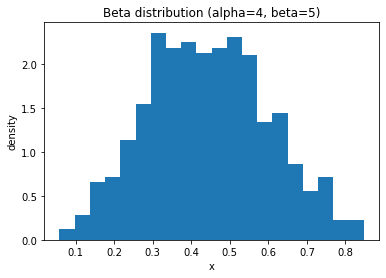

In [7]:
alpha, beta = 4, 5
s = np.random.beta(alpha, beta, 1000)
plt.hist(s, bins=20, density=True)
plt.xlabel('x')
plt.ylabel('density')
plt.title(f'Beta distribution (alpha={alpha}, beta={beta})')
plt.show()

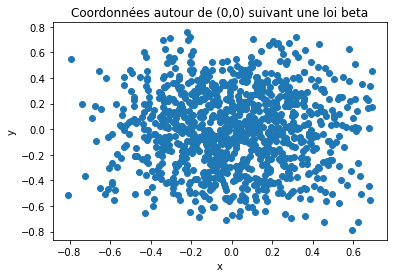

In [8]:
#Ici, on utilise 2*np.random.beta(alpha, beta, 100) -1 pour mapper les valeurs générées entre [0,1] à [-1,1]

#Si vous souhaitez plutôt avoir un tableau de coordonnées vous pourriez utiliser numpy.column_stack pour
#regrouper x, y en un tableau avec la shape (100,2) ou utiliser numpy.vstack pour stacker x et y horizontalement.

import matplotlib.pyplot as plt

alpha, beta = 5, 5 # jouer avec les paramètres

x = 2*np.random.beta(alpha, beta, 1000) - 1
y = 2*np.random.beta(alpha, beta, 1000) - 1

points = np.column_stack((x,y))
points += [0,0]

#Si vous voulez s'assurer que tous les points se trouvent bien 
#dans l'intervalle [-1,1] vous pouvez utiliser la méthode numpy.clip
#pour limiter les coordonnées dans cet intervalle : 
points = np.clip(points, -1, 1)


plt.scatter(points[:, 0], points[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coordonnées autour de (0,0) suivant une loi beta')
plt.show()